<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(4)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.804073,80.756662,46.396534,-91.200343,107.756927,-328.884282,436.641208
1,0.0,1.0,56.698383,29.481336,34.780165,112.307873,243.267758,-321.657216,564.924973
2,0.0,2.0,78.845320,63.841729,29.304491,1458.713466,1640.705008,-130.772988,1771.477995
3,0.0,3.0,31.245798,42.615603,80.188478,1677.192741,1841.242619,-41.931262,1883.173881
4,0.0,4.0,67.948451,53.042109,73.880613,1620.733377,1825.604551,725.786608,1099.817943
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,66.234284,85.388166,23.129389,-8958.761032,-8774.009193,1059.937341,-9833.946534
249996,999.0,246.0,91.731304,57.697082,73.671119,-4804.552912,-4571.453407,1184.214650,-5755.668057
249997,999.0,247.0,39.263962,76.127550,68.118983,4340.035717,4533.546212,1086.818738,3446.727475
249998,999.0,248.0,28.610748,75.089930,48.132564,2627.172468,2789.005710,777.284419,2011.721291


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    61.804073  80.756662  46.396534   -91.200343   107.756927   
      1.0    56.698383  29.481336  34.780165   112.307873   243.267758   
      2.0    78.845320  63.841729  29.304491  1458.713466  1640.705008   
      3.0    31.245798  42.615603  80.188478  1677.192741  1841.242619   
      4.0    67.948451  53.042109  73.880613  1620.733377  1825.604551   
...                ...        ...        ...          ...          ...   
999.0 245.0  66.234284  85.388166  23.129389 -8958.761032 -8774.009193   
      246.0  91.731304  57.697082  73.671119 -4804.552912 -4571.453407   
      247.0  39.263962  76.127550  68.118983  4340.035717  4533.546212   
      248.0  28.610748  75.089930  48.132564  2627.172468  2789.005710   
      249.0  88.425740  83.943440  37.938813  1005.562890  1225.870884   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -328.884282   436.641208  
      1.0    -321.657216   564.924973  
      2.0    -130.772988  1771.477995  
      3.0     -41.931262  1883.173881  
      4.0     725.786608  1099.817943  
...                  ...          ...  
999.0 245.0  1059.937341 -9833.946534  
      246.0  1184.214650 -5755.668057  
      247.0  1086.818738  3446.727475  
      248.0   777.284419  2011.721291  
      249.0  1360.669427  -134.798543  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    61.804073  80.756662  46.396534   -91.200343   107.756927   
      1.0    56.698383  29.481336  34.780165   112.307873   243.267758   
      2.0    78.845320  63.841729  29.304491  1458.713466  1640.705008   
      3.0    31.245798  42.615603  80.188478  1677.192741  1841.242619   
      4.0    67.948451  53.042109  73.880613  1620.733377  1825.604551   
...                ...        ...        ...          ...          ...   
999.0 245.0  66.234284  85.388166  23.129389 -8958.761032 -8774.009193   
      246.0  91.731304  57.697082  73.671119 -4804.552912 -4571.453407   
      247.0  39.263962  76.127550  68.118983  4340.035717  4533.546212   
      248.0  28.610748  75.089930  48.132564  2627.172468  2789.005710   
      249.0  88.425740  83.943440  37.938813  1005.562890  1225.870884   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -328.884282   436.641208  
      1.0    -321.657216   564.924973  
      2.0    -130.772988  1771.477995  
      3.0     -41.931262  1883.173881  
      4.0     725.786608  1099.817943  
...                  ...          ...  
999.0 245.0  1059.937341 -9833.946534  
      246.0  1184.214650 -5755.668057  
      247.0  1086.818738  3446.727475  
      248.0   777.284419  2011.721291  
      249.0  1360.669427  -134.798543  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,61.804073,80.756662,46.396534,-91.200343,107.756927,-328.884282,436.641208
1,0.0,1.0,56.698383,29.481336,34.780165,112.307873,243.267758,-321.657216,564.924973
2,0.0,2.0,78.845320,63.841729,29.304491,1458.713466,1640.705008,-130.772988,1771.477995
3,0.0,3.0,31.245798,42.615603,80.188478,1677.192741,1841.242619,-41.931262,1883.173881
4,0.0,4.0,67.948451,53.042109,73.880613,1620.733377,1825.604551,725.786608,1099.817943
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,66.234284,85.388166,23.129389,-8958.761032,-8774.009193,1059.937341,-9833.946534
249996,999.0,246.0,91.731304,57.697082,73.671119,-4804.552912,-4571.453407,1184.214650,-5755.668057
249997,999.0,247.0,39.263962,76.127550,68.118983,4340.035717,4533.546212,1086.818738,3446.727475
249998,999.0,248.0,28.610748,75.089930,48.132564,2627.172468,2789.005710,777.284419,2011.721291


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3            e            Y  \
rep   index                                                              
0.0   0.0    61.804073  80.756662  46.396534   -91.200343   107.756927   
      1.0    56.698383  29.481336  34.780165   112.307873   243.267758   
      2.0    78.845320  63.841729  29.304491  1458.713466  1640.705008   
      3.0    31.245798  42.615603  80.188478  1677.192741  1841.242619   
      4.0    67.948451  53.042109  73.880613  1620.733377  1825.604551   
...                ...        ...        ...          ...          ...   
999.0 245.0  66.234284  85.388166  23.129389 -8958.761032 -8774.009193   
      246.0  91.731304  57.697082  73.671119 -4804.552912 -4571.453407   
      247.0  39.263962  76.127550  68.118983  4340.035717  4533.546212   
      248.0  28.610748  75.089930  48.132564  2627.172468  2789.005710   
      249.0  88.425740  83.943440  37.938813  1005.562890  1225.870884   

                   y_hat        e_hat  
rep   index                            
0.0   0.0    -328.884282   436.641208  
      1.0    -321.657216   564.924973  
      2.0    -130.772988  1771.477995  
      3.0     -41.931262  1883.173881  
      4.0     725.786608  1099.817943  
...                  ...          ...  
999.0 245.0  1059.937341 -9833.946534  
      246.0  1184.214650 -5755.668057  
      247.0  1086.818738  3446.727475  
      248.0   777.284419  2011.721291  
      249.0  1360.669427  -134.798543  

[250000 rows x 7 columns]

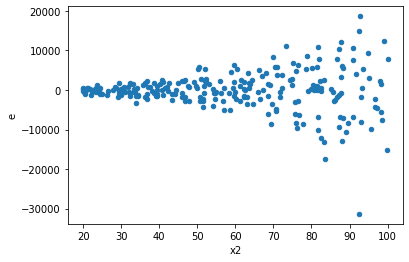

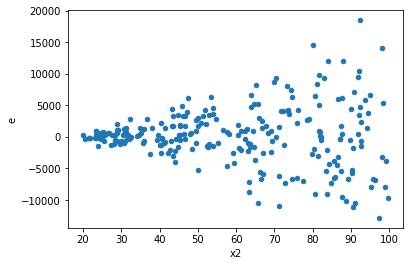

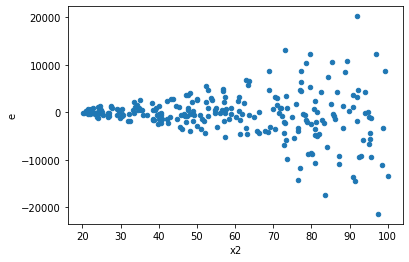

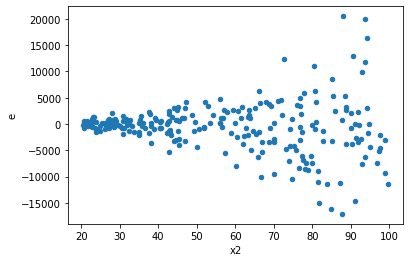

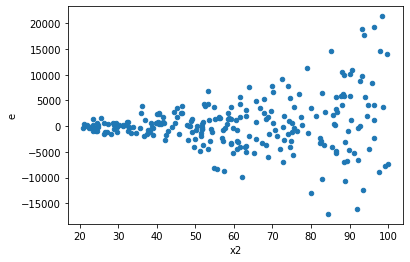

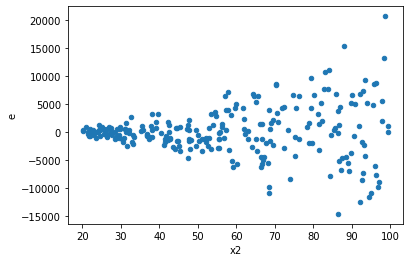

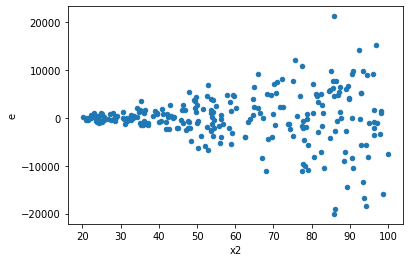

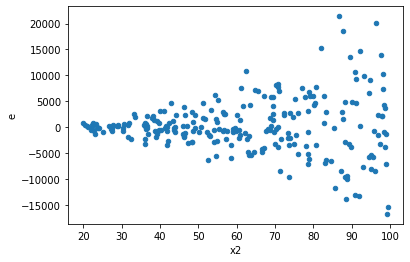

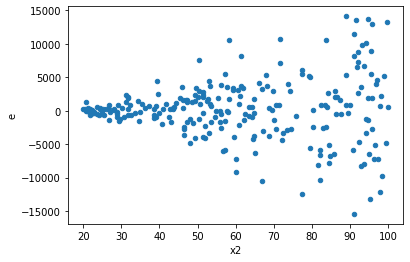

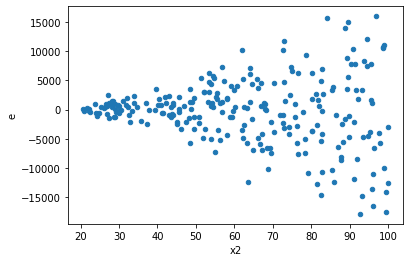

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,138.0,106.0,1105100105.690208,3519670952.2320523,8007971.780363826,33204442.9455854,4.1464235709478015,3.6126657221302594e-13,0.9999999999998194,1.8063328610651297e-13,Reject001=0 : Heteroscedasticity
9.0,140.0,104.0,1986721279.2981462,5841239919.53349,14190866.280701045,56165768.45705279,3.957881594123381,2.341016269724605e-12,0.9999999999988295,1.1705081348623025e-12,Reject001=0 : Heteroscedasticity
10.0,133.0,111.0,3387577056.5834727,3290505243.1602783,25470504.184838142,29644191.37982233,1.1638635483889896,0.4092831874041374,0.7953584062979313,0.2046415937020687,Reject001=1 : Homoscedasticity
11.0,120.0,124.0,340824706.8059519,7266869044.091534,2840205.890049599,58603782.6136414,20.63363885658937,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
12.0,132.0,112.0,3358127722.346532,3026251395.854785,25440361.532928273,27020101.74870344,1.062095824138759,0.7446951344862849,0.6276524327568576,0.37234756724314244,Reject001=1 : Homoscedasticity
14.0,131.0,113.0,3314495752.799036,3957537531.486655,25301494.29617585,35022456.03085536,1.38420504421151,0.07646161703045773,0.9617691914847711,0.038230808515228865,Reject001=1 : Homoscedasticity
15.0,124.0,120.0,827719440.8210354,5353195160.92,6675156.780814801,44609959.674333334,6.682983057798387,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
16.0,118.0,126.0,987954647.7527221,4208432952.742334,8372497.014853577,33400261.52970106,3.9892831816417416,1.3633538742396922e-13,0.9999999999999318,6.816769371198461e-14,Reject001=0 : Heteroscedasticity
18.0,129.0,115.0,1427593056.61128,5012698069.009204,11066612.841947908,43588678.8609496,3.9387551984946163,6.585842982076429e-13,0.9999999999996707,3.2929214910382143e-13,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,138.0,106.0,4097240742.1647825,1811266259.2689314,29690150.305541903,17087417.540272936,0.5755247906940852,0.0023343867960997702,Reject001=0 : Heteroscedasticity
1.0,125.0,119.0,3836994018.521579,1313911917.8194706,30695952.14817263,11041276.620331686,0.3596981311097394,3.001843120108044e-08,Reject001=0 : Heteroscedasticity
2.0,123.0,121.0,5111219497.701372,375750703.2697233,41554630.06261278,3105377.71297292,0.07473000501493736,8.335429819412989e-38,Reject001=0 : Heteroscedasticity
3.0,122.0,122.0,5323082508.755993,280609265.60255164,43631823.84226224,2300075.9475618987,0.0527155581640853,8.807677709227715e-46,Reject001=0 : Heteroscedasticity
4.0,121.0,123.0,5570580681.537483,615465973.561106,46037856.87221061,5003788.402935821,0.10868856073872131,3.577974478492946e-29,Reject001=0 : Heteroscedasticity
5.0,138.0,106.0,1105100105.690208,3519670952.2320523,8007971.780363826,33204442.9455854,4.1464235709478015,3.6126657221302594e-13,Reject001=0 : Heteroscedasticity
6.0,136.0,108.0,5015434024.073015,1812068144.4916909,36878191.35347805,16778408.745293435,0.45496831947294053,1.5021718750260488e-05,Reject001=0 : Heteroscedasticity
7.0,111.0,133.0,3672751642.684733,2993853671.56494,33087852.636799395,22510177.98169128,0.6803154689058328,0.03658141808460243,Reject001=1 : Homoscedasticity
8.0,115.0,129.0,3537149209.729017,1486891566.3307097,30757819.21503493,11526291.211865967,0.3747434475533859,1.5373356697905916e-07,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    734
Reject001=1 : Homoscedasticity      266
Name: Result_test, dtype: int64